In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

In [172]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [106]:
#when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed.

In [126]:
li = train.isnull().sum().sort_values(ascending=False)

In [133]:
missing_data = pd.DataFrame([li])

In [135]:
missing_data.head(15)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageYrBlt,GarageCond,GarageType,GarageFinish,...,BsmtUnfSF,BsmtFinSF1,RoofStyle,Foundation,ExterCond,ExterQual,Exterior2nd,Exterior1st,RoofMatl,SalePrice
0,1453,1406,1369,1179,690,259,81,81,81,81,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import missingno as msn

<AxesSubplot:>

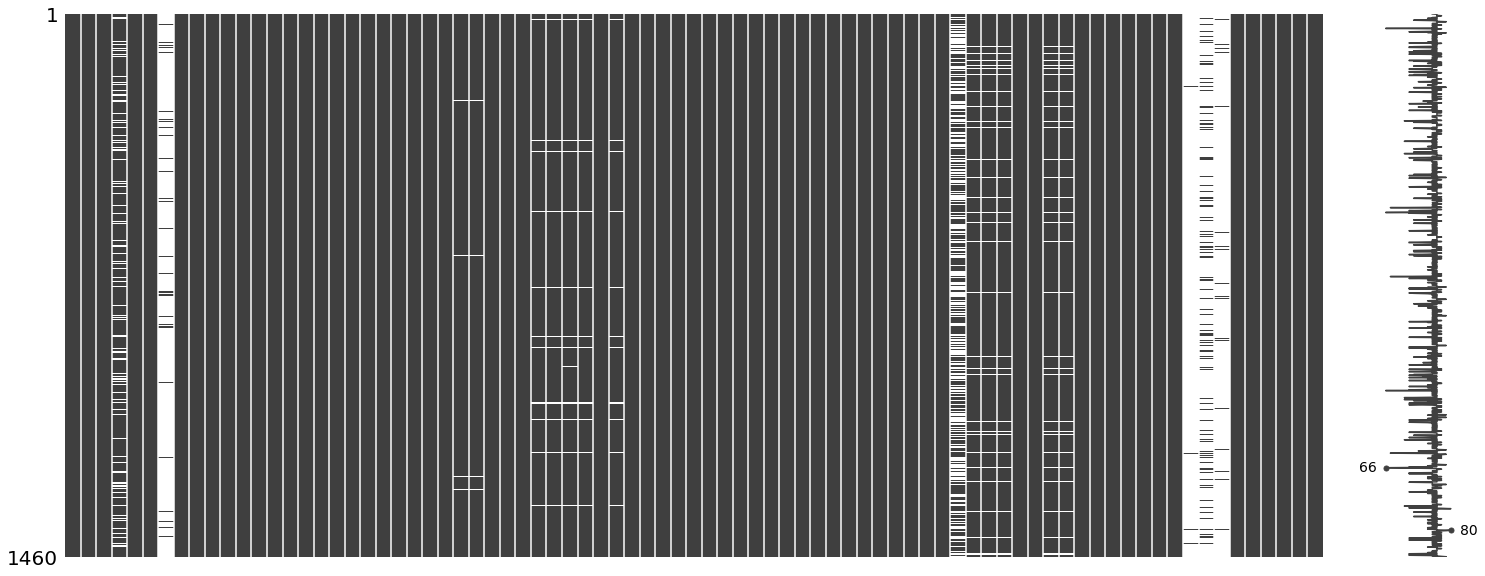

In [8]:
msn.matrix(train)

In [9]:
# we can see few columns have null values 

In [11]:
train.shape

(1460, 81)

In [12]:
# we can not simply drop null values here because of our data set is not big

In [13]:
# we should quick investigate about our data and shoud choose most important featues froma all features 

In [14]:
# what are the most considering features that you are gonna buy a house ?

In [15]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [48]:
# according to my sense i choose below features are most important for decide the 'SalePrice' (accordig to me)
# ('MSZoning','LotArea','TotalBsmtSF',Utilities','BldgType','OverallQual','YearBuilt','HeatingQC','SaleType')

In [49]:
train1 = train[['MSZoning','LotArea','TotalBsmtSF','Utilities','BldgType','OverallQual','YearBuilt','HeatingQC','SaleType','SalePrice']]

<AxesSubplot:>

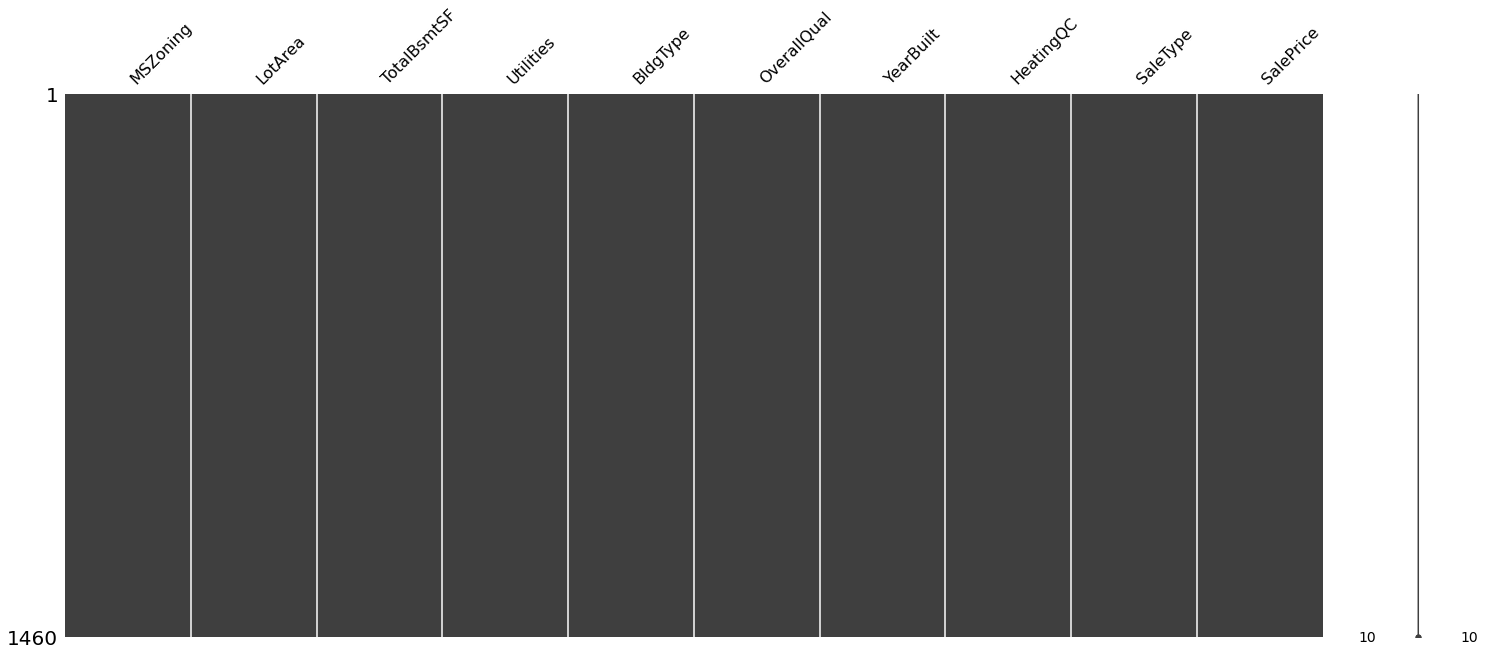

In [50]:
msn.matrix(train1)

In [23]:
# we can see no null values in our new considred features

In [51]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSZoning     1460 non-null   object
 1   LotArea      1460 non-null   int64 
 2   TotalBsmtSF  1460 non-null   int64 
 3   Utilities    1460 non-null   object
 4   BldgType     1460 non-null   object
 5   OverallQual  1460 non-null   int64 
 6   YearBuilt    1460 non-null   int64 
 7   HeatingQC    1460 non-null   object
 8   SaleType     1460 non-null   object
 9   SalePrice    1460 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 114.2+ KB


### Find the relationship between slaeprice and each features

#### LotArea  and sales price

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

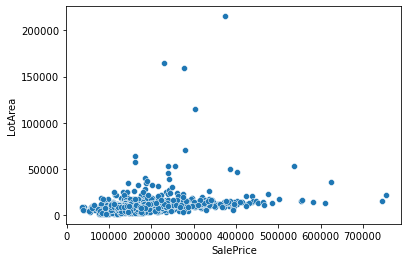

In [38]:
sns.scatterplot(data=train1 , x= 'SalePrice',y='LotArea')

In [39]:
# we can see a very very small slop... looks like no leaner realationship..

In [40]:
# we try deeep it

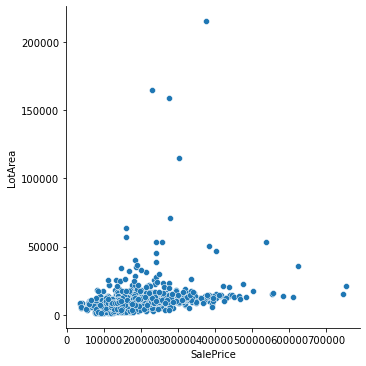

In [43]:
sns.relplot(data=train1 , x= 'SalePrice',y='LotArea',kind='scatter')

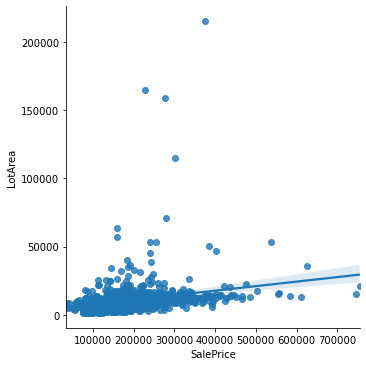

In [44]:
sns.lmplot(data=train1 , x= 'SalePrice',y='LotArea')

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

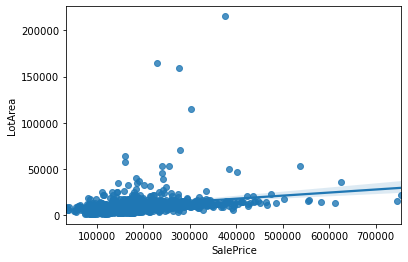

In [45]:
sns.regplot(data=train1 , x= 'SalePrice',y='LotArea')

In [46]:
# we can see it has a very litle effect for sale price .. we should consider to drop this feature later

#### TotalBsmtSF and SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

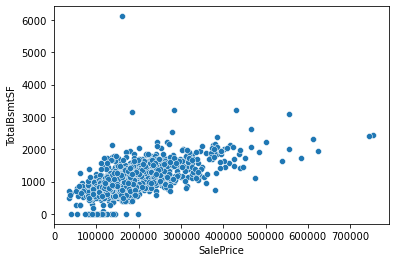

In [52]:
sns.scatterplot(data=train1 , x= 'SalePrice',y='TotalBsmtSF')

In [53]:
#seems like it has a good lenear relationship with sale price

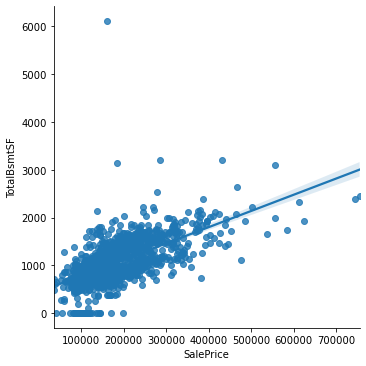

In [55]:
sns.lmplot(data=train1 , x= 'SalePrice',y='TotalBsmtSF')

In [56]:
# yeah, it is a good featue for sale price

##### categoricl features with sale price

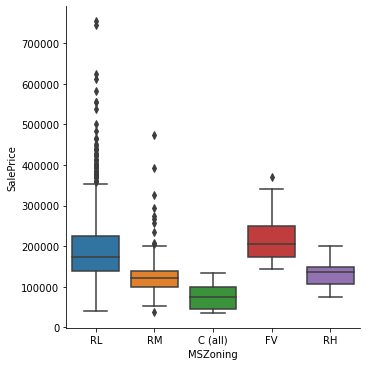

In [64]:
sns.catplot(x='MSZoning', y='SalePrice', data=train1,kind='box')
#plt.xticks(rotation=80)
plt.show()

In [61]:
# msZoning has not a clear pattern

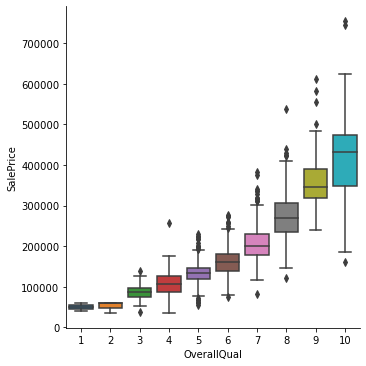

In [63]:
sns.catplot(x='OverallQual', y='SalePrice', data=train1,kind='box')
#plt.xticks(rotation=80)
plt.show()

In [65]:
# we can see sale price is increasing when increase the overall quality

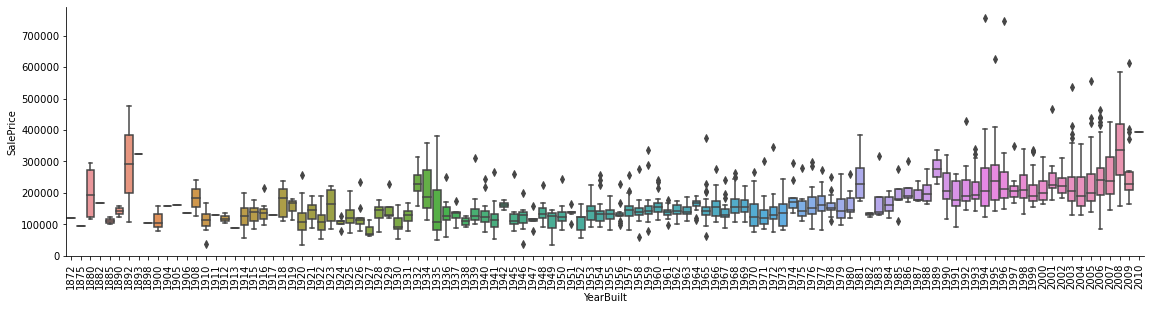

In [69]:
sns.catplot(x='YearBuilt', y='SalePrice', data=train1,kind='box',height=4, aspect=4)
plt.xticks(rotation=90)
plt.show()

In [70]:
# it is not much clear with box plots we should go to anothor plotting option

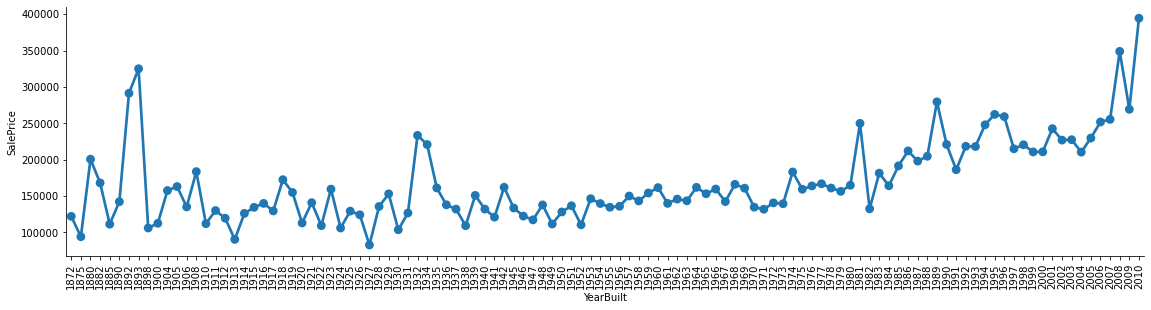

In [72]:
sns.catplot(x='YearBuilt', y='SalePrice', data=train1,kind='point',height=4, aspect=4, ci=None)
plt.xticks(rotation=90)
plt.show()

In [73]:
# i can say when home is a a new one it price is high 

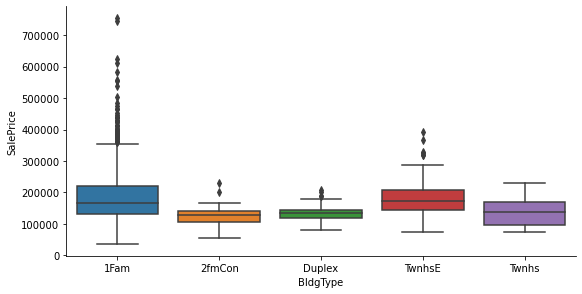

In [75]:
sns.catplot(x='BldgType', y='SalePrice', data=train1,kind='box',height=4, aspect=2)
#plt.xticks(rotation=90)
plt.show()

In [76]:
# BldgType also has not an outstanding relationship

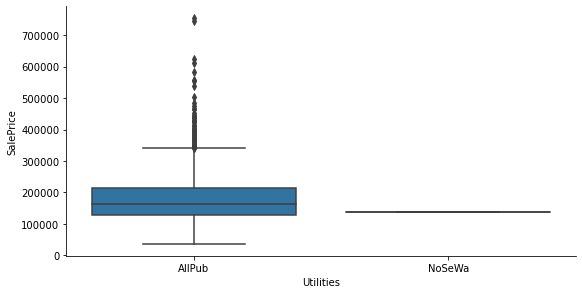

In [77]:
sns.catplot(x='Utilities', y='SalePrice', data=train1,kind='box',height=4, aspect=2)
#plt.xticks(rotation=90)
plt.show()

In [78]:
# not a good feature

In [79]:
train1.columns

Index(['MSZoning', 'LotArea', 'TotalBsmtSF', 'Utilities', 'BldgType',
       'OverallQual', 'YearBuilt', 'HeatingQC', 'SaleType', 'SalePrice'],
      dtype='object')

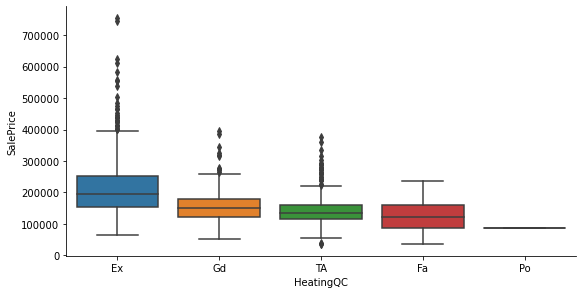

In [80]:
sns.catplot(x='HeatingQC', y='SalePrice', data=train1,kind='box',height=4, aspect=2)
#plt.xticks(rotation=90)
plt.show()

In [81]:
# when increase the heating quality sale price also increase

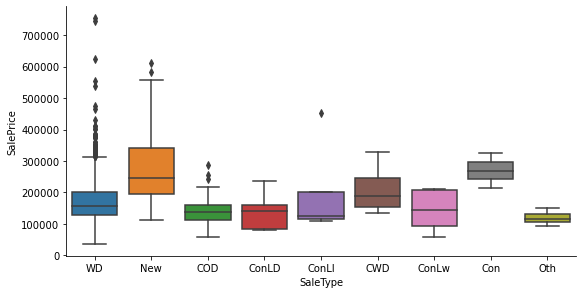

In [82]:
sns.catplot(x='SaleType', y='SalePrice', data=train1,kind='box',height=4, aspect=2)
#plt.xticks(rotation=90)
plt.show()

In [83]:
# sale type also effect to sale price 

In [84]:
# summery -> overall quality,yearsbuilt,heating quality,saletype,totalbasement have a good effecting power to sale price
# we should go deep for select right features

In [85]:
# we just inspected features using human senses... so now we should do it strctured way

In [86]:
# 1) correlation heat map ( we can get a rough idea about realationships )

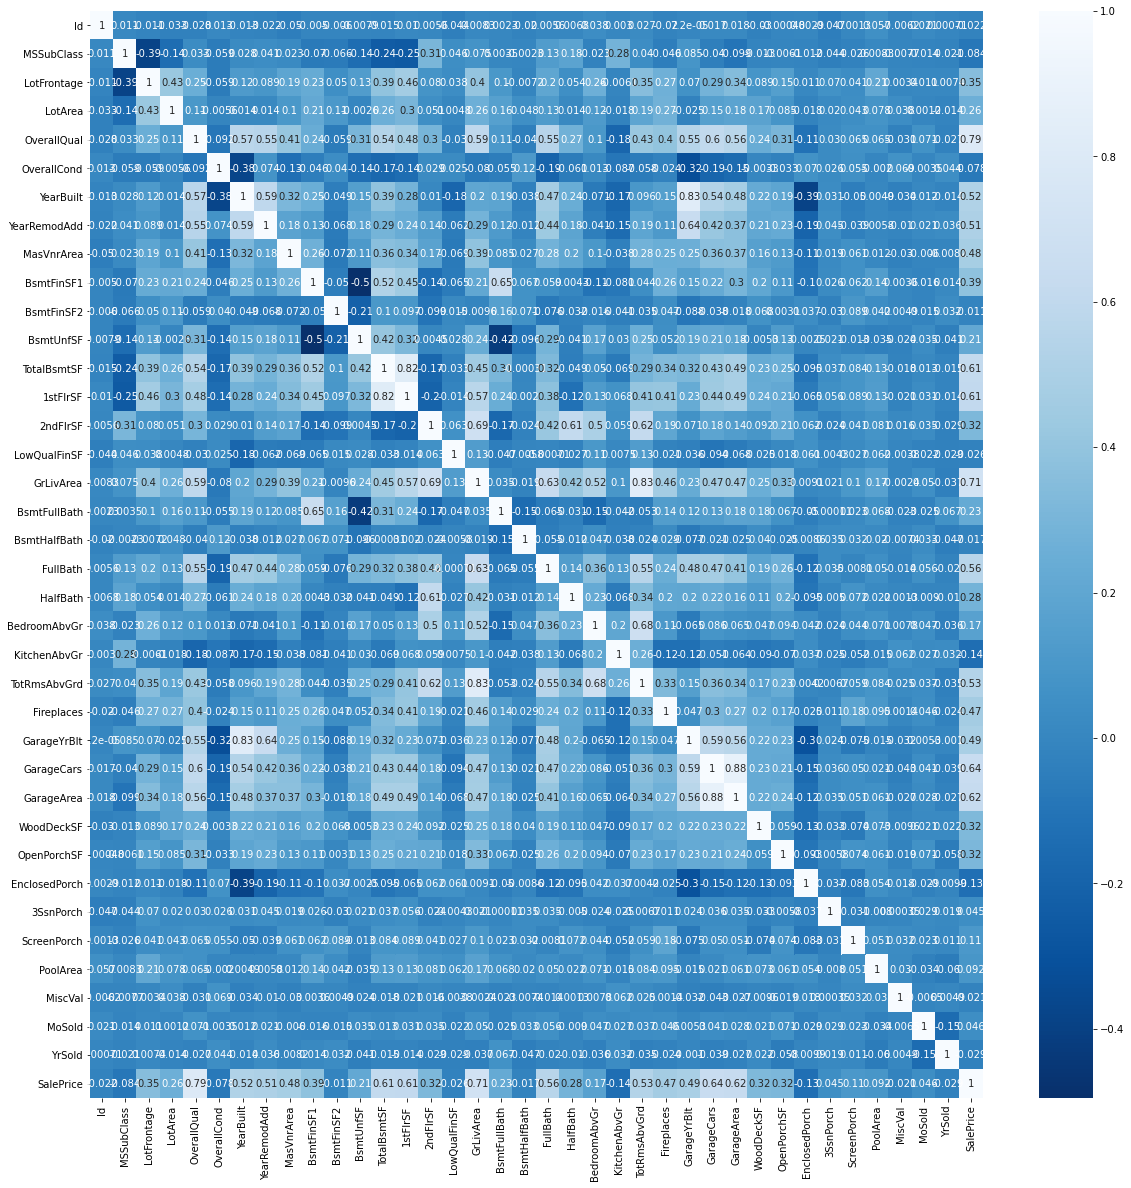

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True,cmap='Blues_r')
plt.show()

In [90]:
# we can see few featues have multi-coleanerity issues
# when consider about sale price , we can see overall quality,yearsbuilt,totalbasementSf,grliveArea....... have a good correaltionship with sale price

In [91]:
# we gonna take 10 most correalted features with sale price

In [95]:
k = 11 #number of variables for heatmap
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index

In [96]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [97]:
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)

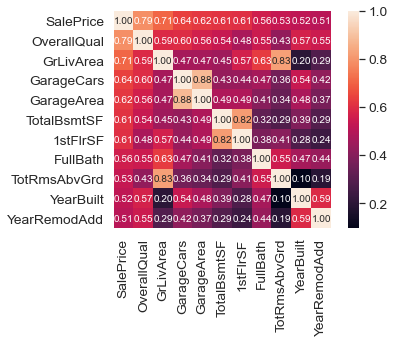

In [98]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [99]:
# garage cars and garage area have 0.88 correlationship so we have to choose one of them ----> garage  caras
# totalbasementSf and 1stFlrsf have 0.82 correlationship so we have to choose one of them ----> totalbasementSF
# TotRmsAbvGrd and GrLivArea has 0.83 correlationship so we have to choose one of them ----> GrLivArea


In [100]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath',  'YearBuilt','YearRemodAdd']

In [101]:
# those 8 cols chose from zoomed sale price heatmap and we gonna inspect more

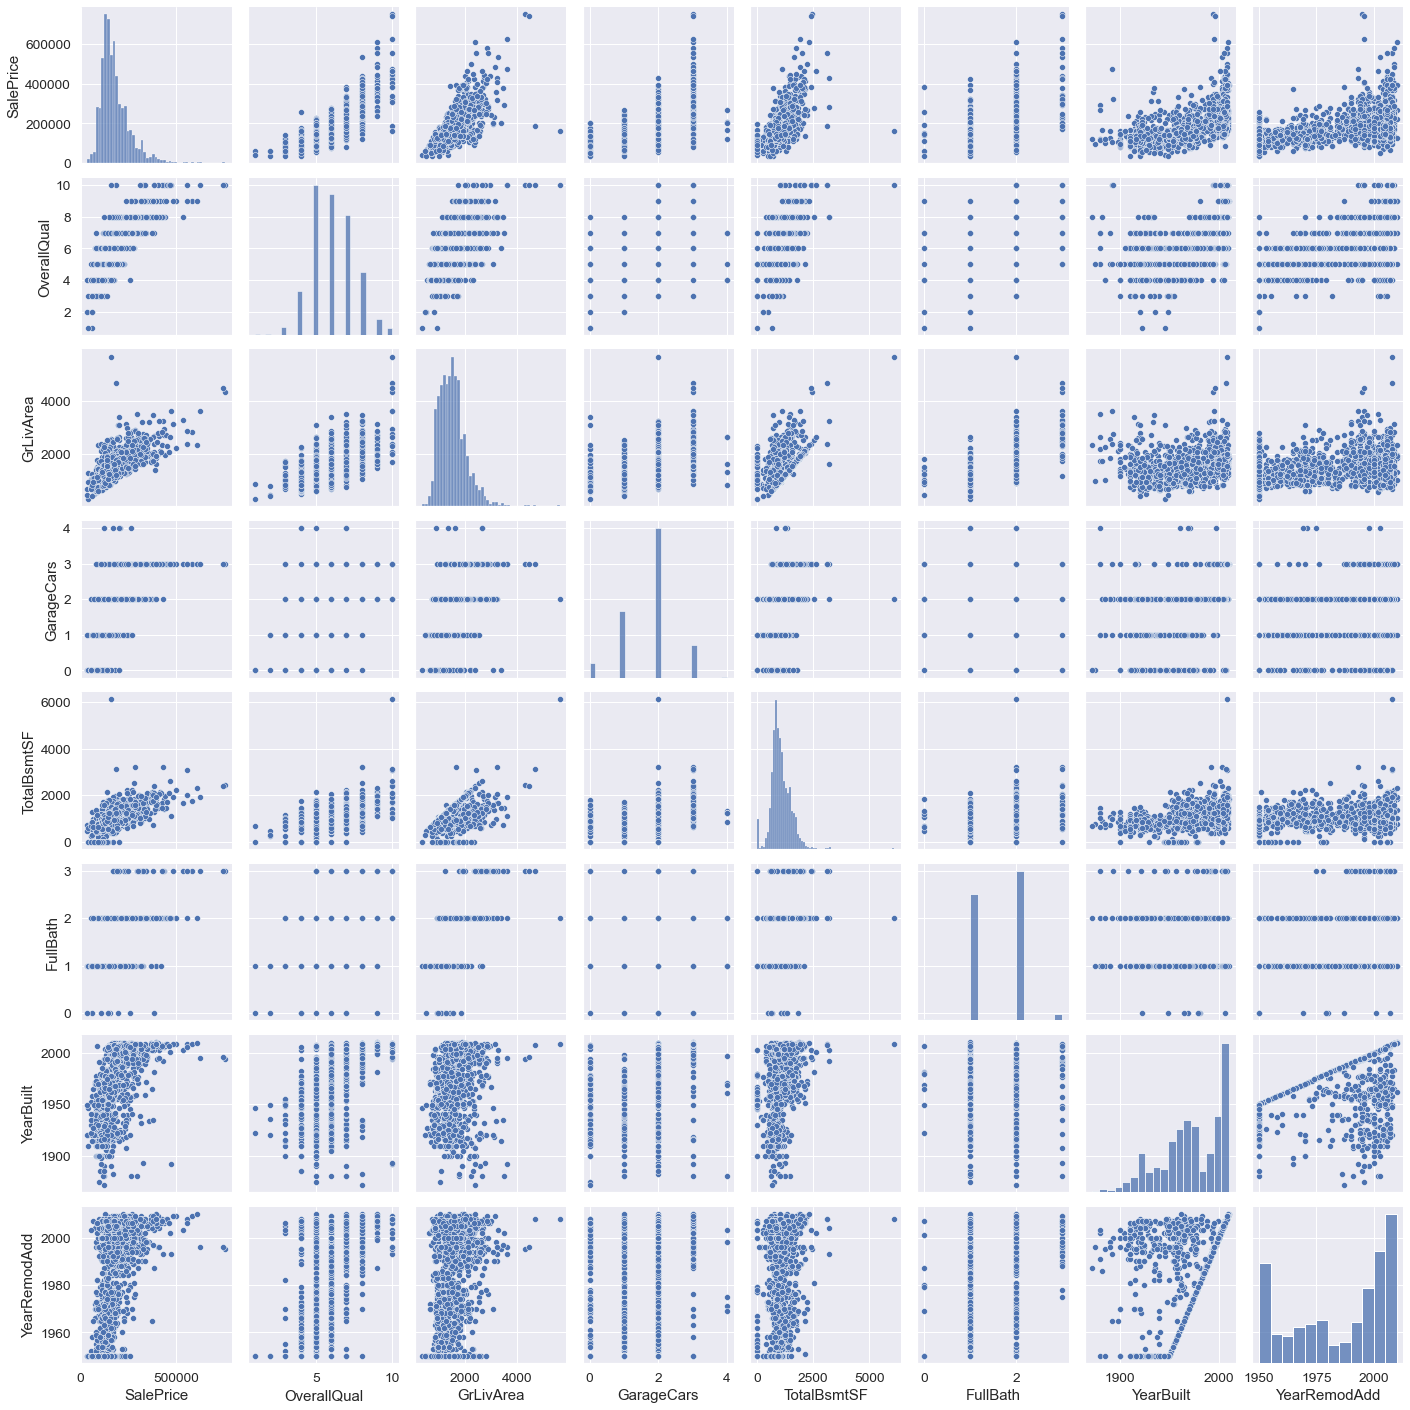

In [102]:
sns.pairplot(data=train[cols])
plt.show()

In [103]:
# we gonna customize our pairgrid

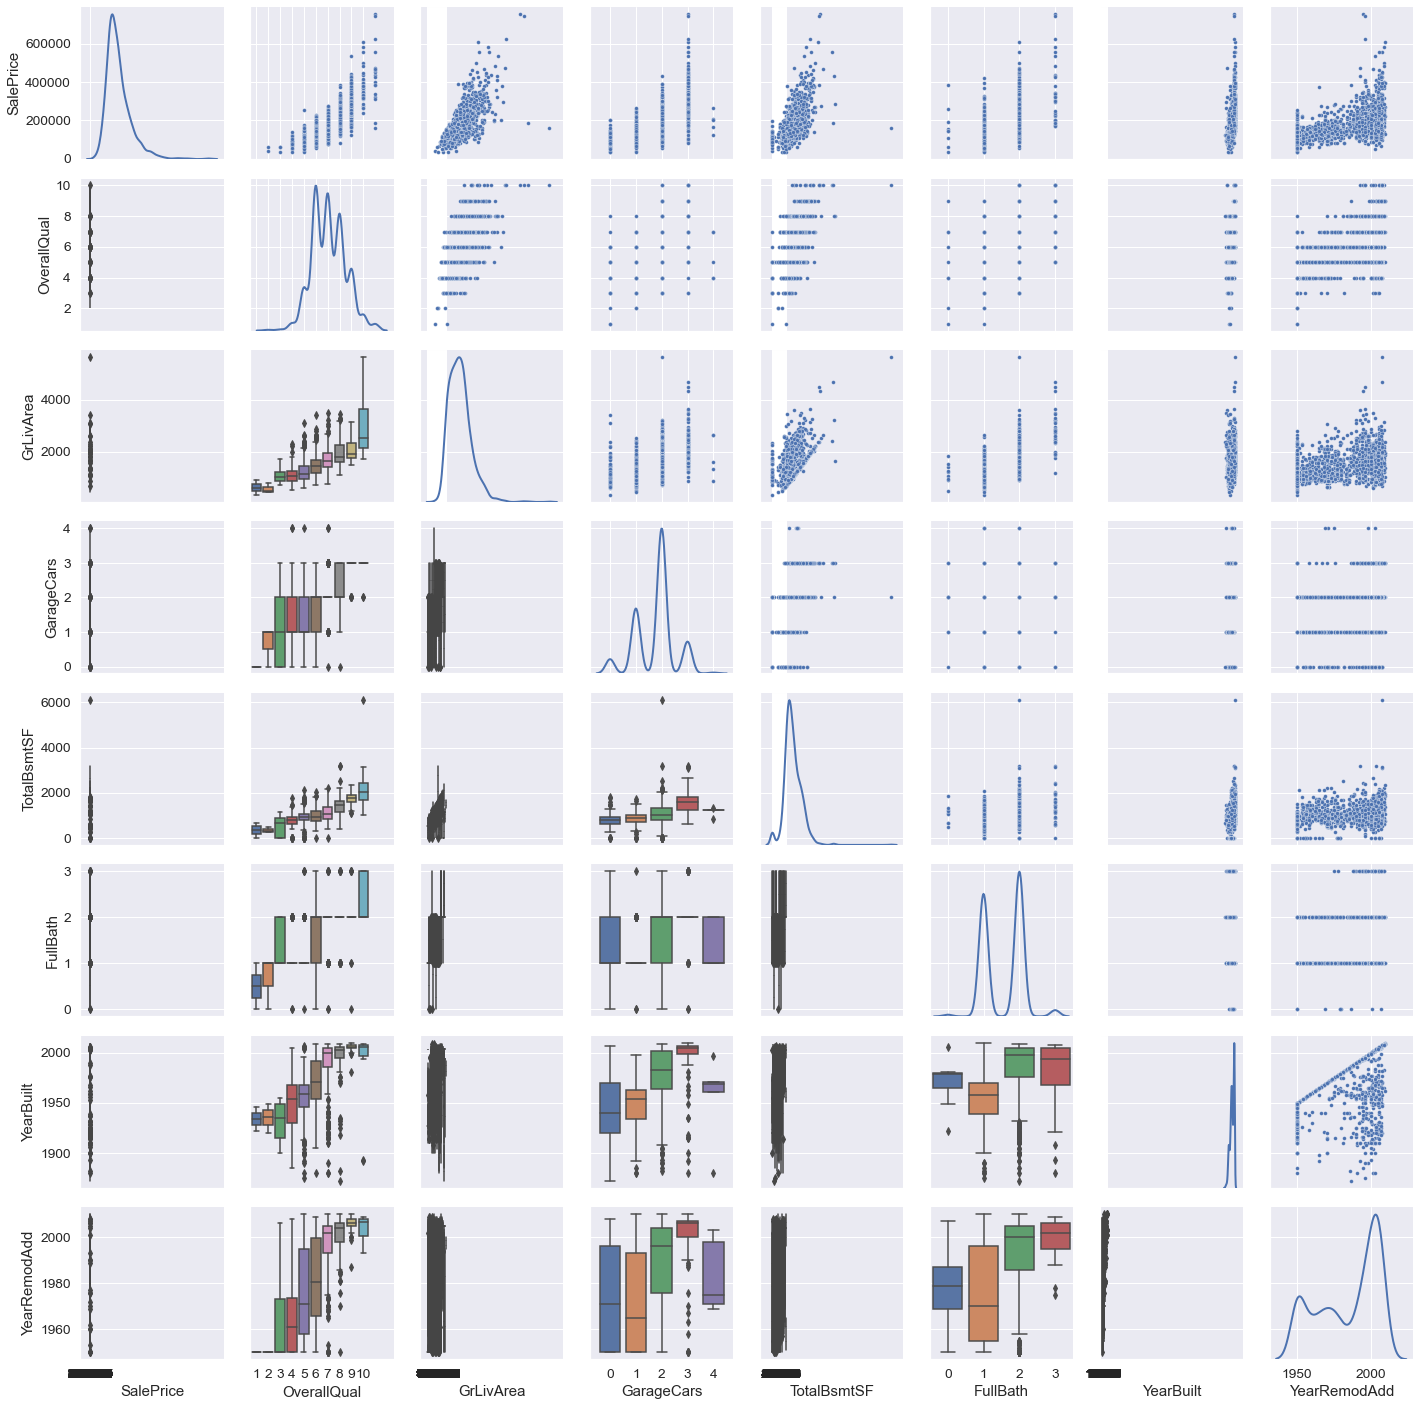

In [105]:
g = sns.PairGrid(data=train[cols], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.boxplot)
g.map_diag(sns.kdeplot, lw=2)

<AxesSubplot:>

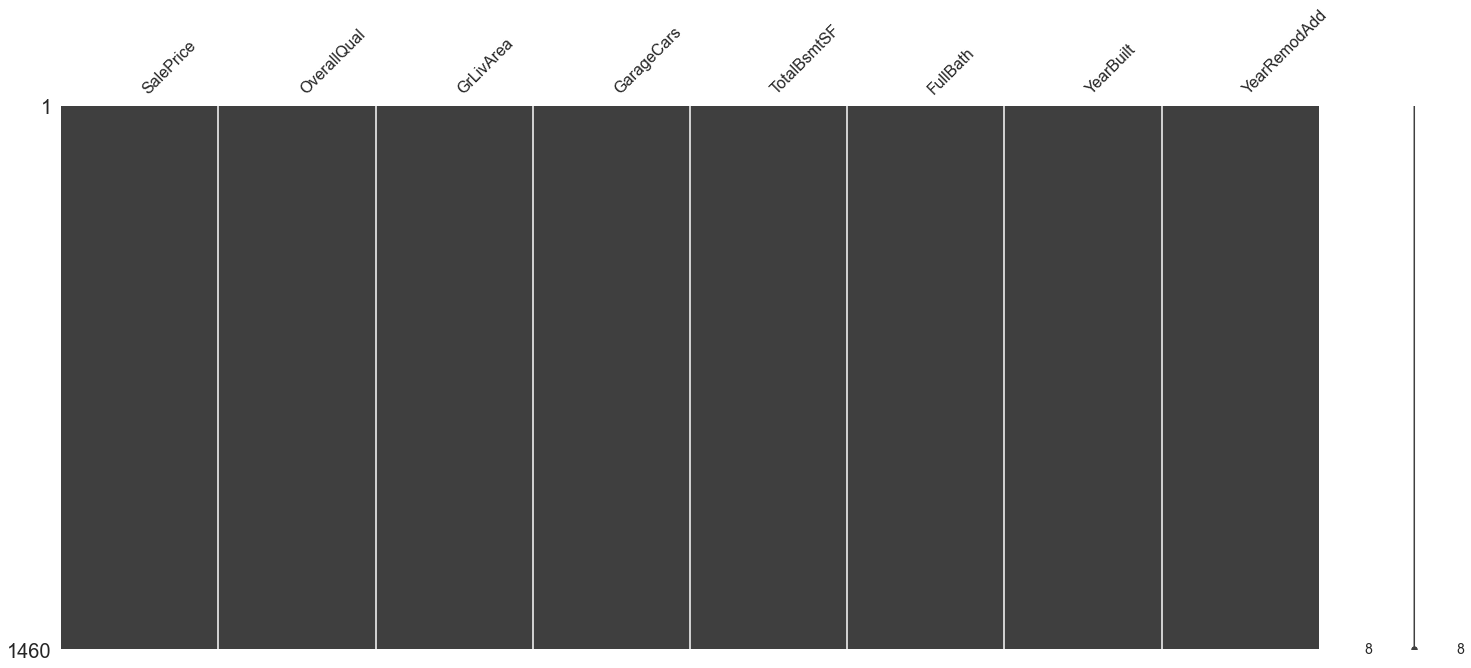

In [108]:
msn.matrix(train[cols])

In [136]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


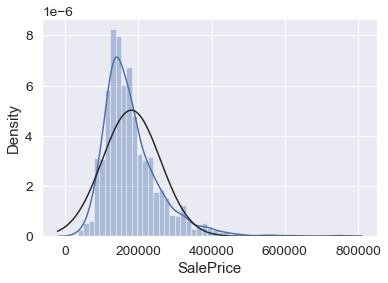

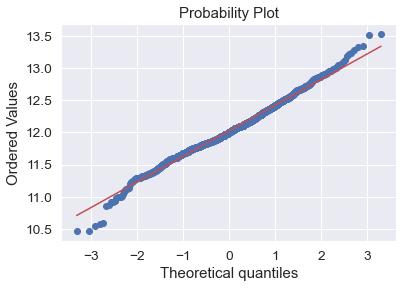

In [144]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [145]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


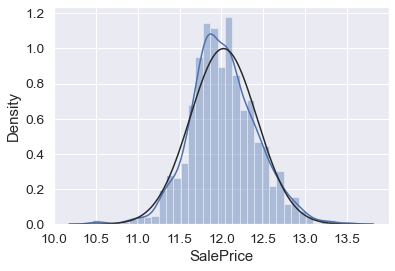

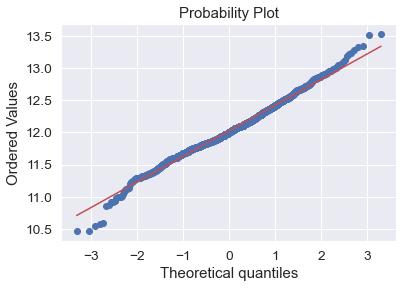

In [146]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


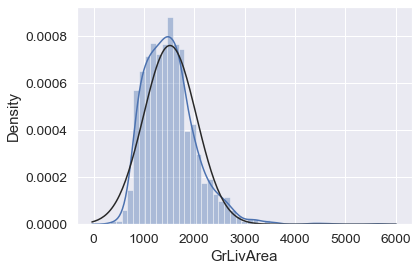

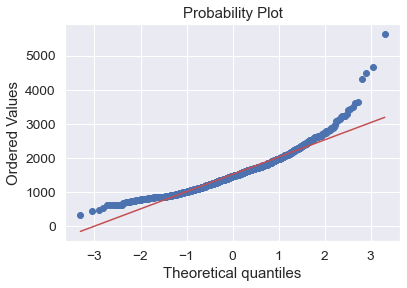

In [147]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [148]:
#data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


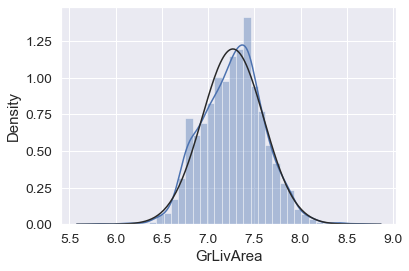

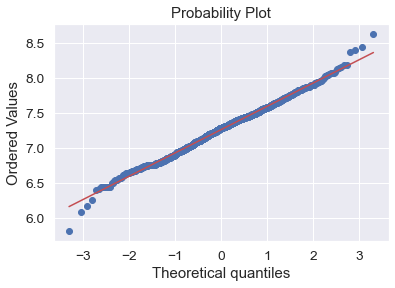

In [149]:
#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


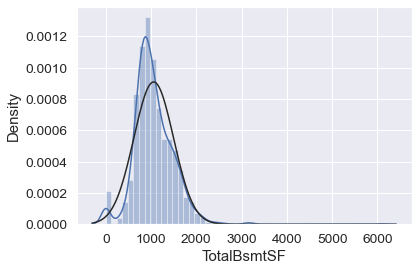

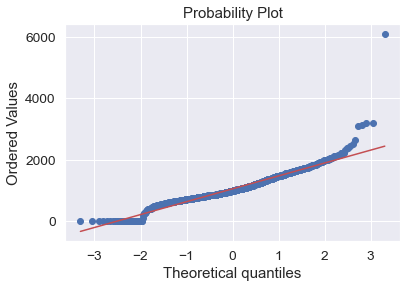

In [150]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [151]:
# it has zero values ..it means we can not use log transformation
# therfor we should make a new feature for grab that information without losing

In [152]:
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [153]:
#transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


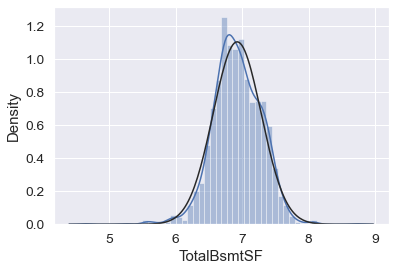

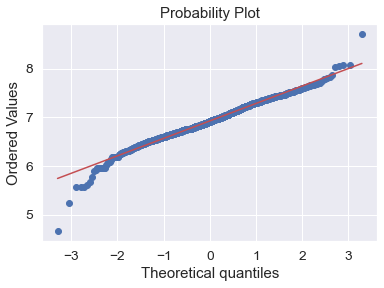

In [154]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [156]:
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd']


#### In the search for writing 'homoscedasticity'

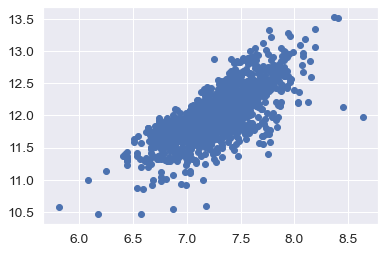

In [166]:
#scatter plot
plt.scatter(train['GrLivArea'], train['SalePrice']);

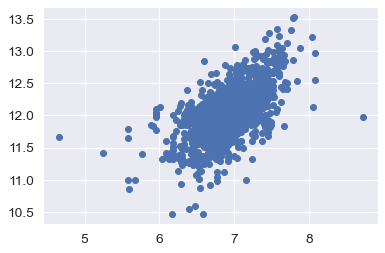

In [167]:
#scatter plot
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']);

In [168]:
# this is it .. here i concerend about EDA and some of FE but long way to go for destination 
# i just stop this notbook from here and i start a new notebook by taking the knowladge fro this note book

In [169]:
train2 = train[cols]

In [170]:
#now you should do same FE to your train set

In [174]:
test2 = test[[
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd']]

In [175]:
test2.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [176]:
test2['GrLivArea'] = np.log(test2['GrLivArea'])

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [177]:
test2['TotalBsmtSF'] = np.log(test2['TotalBsmtSF'])

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
## modeling

In [179]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [180]:
X_train = train2.drop(['SalePrice'],axis=1)

In [181]:
y_train = train2['SalePrice']

In [182]:
X_test = test2

In [183]:
rd = RandomForestRegressor()

In [184]:
rd.fit(X_train,y_train)

RandomForestRegressor()

In [189]:
X_test = X_test.fillna(X_train.mean())

In [192]:
X_test = np.where(X_test.values >= np.finfo(np.float64).max)

In [193]:
y_pred = rd.predict(X_test)

ValueError: Found array with 0 feature(s) (shape=(2, 0)) while a minimum of 1 is required.